In [1]:
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense,BatchNormalization,Dropout
from tensorflow.keras import optimizers
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


In [2]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Neural Net modules
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

In [3]:
df = pd.read_excel('data_final.xlsx')

In [4]:
df.shape

df.head()


stime  traveltime  forcast  section  weekend  intersection  day  \
0  0.274549         180   180.00        1        0             1    3   
1  0.276493         210   180.00        1        0             1    1   
2  0.277963         220   186.00        1        0             1    3   
3  0.280405         250   192.80        1        1             1    6   
4  0.282940         160   204.24        1        1             1    5   

   Unnamed: 7  Unnamed: 8  0.2  
0         NaN         NaN  NaN  
1         NaN         NaN  NaN  
2         NaN         NaN  NaN  
3         NaN         NaN  NaN  
4         NaN         NaN  NaN

In [5]:
df = df[['stime','forcast','section','day']]
df.head()

stime  forcast  section  day
0  0.274549   180.00        1    3
1  0.276493   180.00        1    1
2  0.277963   186.00        1    3
3  0.280405   192.80        1    6
4  0.282940   204.24        1    5

In [6]:
y = df['forcast']
X = df.drop('forcast', axis=1)
print(X.shape, y.shape)

# convert to numpy array
X = np.array(X)
y = np.array(y)

# split into X_train and X_test
# always split into X_train, X_test first THEN apply minmax scaler
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.25,
                                                    random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

# use minMax scaler
min_max_scaler = MinMaxScaler()
X_train = min_max_scaler.fit_transform(X_train)
X_test = min_max_scaler.transform(X_test)

(2906, 3) (2906,)
(2179, 3) (727, 3) (2179,) (727,)



# ANN

In [7]:
def create_model():
    model = Sequential()
    model.add(Dense(3, input_shape=(X_train.shape[1],), activation='relu')) # (features,)
    model.add(Dense(9,Activation('relu')))                        
    model.add(Dense(27, Activation('relu')))                      
    model.add(Dense(81, Activation('relu')))                      
    model.add(Dense(81, Activation('relu')))                      
    model.add(Dense(81, Activation('relu')))
    model.add(Dense(243, Activation('relu')))
    model.add(Dense(81, Activation('relu')))
    model.add(Dense(27, Activation('relu')))
    model.add(Dense(1, activation='linear')) # output node
    model.summary() 


    # compile the model
    model.compile(optimizer='adam', loss='mse', metrics=['mae', 'mse', 'mape'])

    # early stopping callback
    es = EarlyStopping(monitor='val_loss',
                       mode='min',
                       patience=100,
                       restore_best_weights = True)

   
    return model

In [8]:
checkpoint_path = "D:/busPrediction/training/cp.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(checkpoint_path,save_weights_only = True,verbose = 1)
model = create_model()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 3)                 12        
                                                                 
 dense_1 (Dense)             (None, 9)                 36        
                                                                 
 dense_2 (Dense)             (None, 27)                270       
                                                                 
 dense_3 (Dense)             (None, 81)                2268      
                                                                 
 dense_4 (Dense)             (None, 81)                6642      
                                                                 
 dense_5 (Dense)             (None, 81)                6642      
                                                                 
 dense_6 (Dense)             (None, 243)               1

In [9]:
history = model.fit(X_train, y_train,
                        validation_data = (X_test, y_test),
                        callbacks=[cp_callback],
                        epochs=500,
                        batch_size=50,
                        verbose=1)

Epoch 1/500
31/44 [====================>.........] - ETA: 0s - loss: 14680.9932 - mae: 117.7700 - mse: 14680.9932 - mape: 96.9786
Epoch 1: saving model to D:/busPrediction/training\cp.ckpt
44/44 [==============================] - 1s 10ms/step - loss: 11903.1826 - mae: 101.0117 - mse: 11903.1826 - mape: 82.9882 - val_loss: 3723.1125 - val_mae: 48.1118 - val_mse: 3723.1125 - val_mape: 46.0065
Epoch 2/500
44/44 [==============================] - ETA: 0s - loss: 1359.7291 - mae: 29.1542 - mse: 1359.7294 - mape: 24.7297
Epoch 2: saving model to D:/busPrediction/training\cp.ckpt
44/44 [==============================] - 0s 6ms/step - loss: 1359.7291 - mae: 29.1542 - mse: 1359.7294 - mape: 24.7297 - val_loss: 924.2310 - val_mae: 25.7910 - val_mse: 924.2310 - val_mape: 23.0649
Epoch 3/500
35/44 [======================>.......] - ETA: 0s - loss: 825.3139 - mae: 23.8361 - mse: 825.3139 - mape: 20.6136
Epoch 3: saving model to D:/busPrediction/training\cp.ckpt
44/44 [==============================

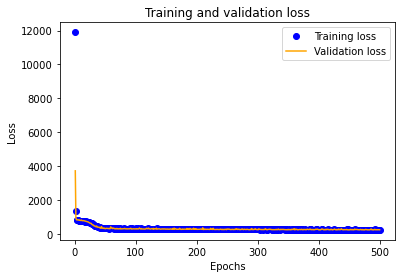

In [10]:
history_dict = history.history
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this
epochs = range(1, len(loss_values) + 1) # range of X (no. of epochs)
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

23/23 [==============================] - 0s 2ms/step


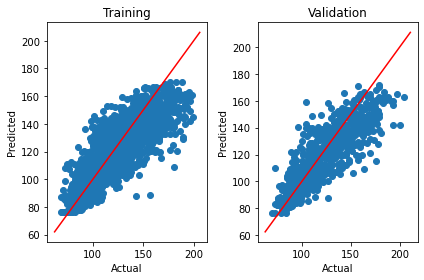

In [11]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()

In [12]:
pred = model.predict(X_test)
trainpreds = model.predict(X_train)

69/69 [==============================] - 0s 2ms/step


In [13]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error
print("\nmape")
print(mape(y_train, trainpreds)) # train
print(mape(y_test, pred)) 
print('\n\n',"mse")
from sklearn.metrics import mean_squared_error as mse
print(mse(y_train, trainpreds)) # train
print(mse(y_test, pred))
print('\n\n',"mae")
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test
print('\n\n','accuracy')
from sklearn.metrics import r2_score
print(r2_score(y_train, trainpreds))
print(r2_score(y_test,pred))


mape
0.09452080054373432
0.09529356583112192


 mse
236.2709372050436
247.4821678538028


 mae
11.692571849123564
11.898100251613377


 accuracy
0.7007984900616261
0.6986105926328172


In [14]:
print(model.predict([[0.4141111,2,1]]))


1/1 [==============================] - 0s 59ms/step
[[110.5323]]


# 1D CNN

In [14]:
sample_size = X_train.shape[0] # number of samples in train set
time_steps  = X_train.shape[1] # number of features in train set
input_dimension = 1 

In [15]:
train_data_reshaped = X_train.reshape(sample_size,time_steps,input_dimension)
print("After reshape train data set shape:\n", train_data_reshaped.shape)
print("1 Sample shape:\n",train_data_reshaped[0].shape)
print("An example sample:\n", train_data_reshaped[0])

After reshape train data set shape:
 (2179, 3, 1)
1 Sample shape:
 (3, 1)
An example sample:
 [[0.33659358]
 [0.75      ]
 [0.5       ]]


In [16]:
def build_conv1D_model():

  n_timesteps = 3 #13
  n_features  = 1 #1 
  model = keras.Sequential(name="model_conv1D")
  model.add(keras.layers.Input(shape=(n_timesteps,n_features)))
  model.add(keras.layers.Conv1D(filters=64, kernel_size=1, activation='relu', name="Conv1D_1"))
  model.add(keras.layers.Dropout(0.5))
  model.add(keras.layers.Conv1D(filters=32, kernel_size=1, activation='relu', name="Conv1D_2"))
  
  model.add(keras.layers.Conv1D(filters=16, kernel_size=1, activation='relu', name="Conv1D_3"))
  
  model.add(keras.layers.MaxPooling1D(pool_size=2, name="MaxPooling1D"))
  model.add(keras.layers.Flatten())
  model.add(keras.layers.Dense(32, activation='relu', name="Dense_1"))
  model.add(keras.layers.Dense(n_features, name="Dense_2"))


  optimizer = tf.keras.optimizers.RMSprop(0.001)

  model.compile(loss='mse',optimizer=optimizer,metrics=['mae'])
  return model

model_conv1D = build_conv1D_model()
model_conv1D.summary()

Model: "model_conv1D"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 Conv1D_1 (Conv1D)           (None, 3, 64)             128       
                                                                 
 dropout (Dropout)           (None, 3, 64)             0         
                                                                 
 Conv1D_2 (Conv1D)           (None, 3, 32)             2080      
                                                                 
 Conv1D_3 (Conv1D)           (None, 3, 16)             528       
                                                                 
 MaxPooling1D (MaxPooling1D)  (None, 1, 16)            0         
                                                                 
 flatten (Flatten)           (None, 16)                0         
                                                                 
 Dense_1 (Dense)             (None, 32)               

In [17]:
history = model_conv1D.fit(train_data_reshaped, y_train, epochs=500,
                    validation_split=0.2, verbose=1)

Epoch 1/500
55/55 [==============================] - 1s 6ms/step - loss: 15006.2236 - mae: 119.2457 - val_loss: 13628.2432 - val_mae: 113.3260
Epoch 2/500
55/55 [==============================] - 0s 4ms/step - loss: 10842.5244 - mae: 99.5302 - val_loss: 6364.8936 - val_mae: 74.5313
Epoch 3/500
55/55 [==============================] - 0s 3ms/step - loss: 3064.2063 - mae: 44.2592 - val_loss: 1162.5057 - val_mae: 26.3767
Epoch 4/500
55/55 [==============================] - 0s 4ms/step - loss: 1501.0863 - mae: 29.6702 - val_loss: 1072.9220 - val_mae: 25.4472
Epoch 5/500
55/55 [==============================] - 0s 4ms/step - loss: 1407.2440 - mae: 28.7602 - val_loss: 1083.9286 - val_mae: 25.1256
Epoch 6/500
55/55 [==============================] - 0s 3ms/step - loss: 1270.9301 - mae: 27.0303 - val_loss: 942.2263 - val_mae: 24.1978
Epoch 7/500
55/55 [==============================] - 0s 3ms/step - loss: 1222.2136 - mae: 26.8738 - val_loss: 974.6475 - val_mae: 23.9199
Epoch 8/500
55/55 [=====

In [18]:
testpreds = model_conv1D.predict(X_test)



23/23 [==============================] - 0s 1ms/step


In [19]:
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error
print("\nmape")
print(mape(y_train, trainpreds)) # train
print(mape(y_test, pred)) 
print('\n\n',"mse")
from sklearn.metrics import mean_squared_error as mse
print(mse(y_train, trainpreds)) # train
print(mse(y_test, pred))
print('\n\n',"mae")
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_train, trainpreds)) # train
print(mean_absolute_error(y_test, pred)) # test
print('\n\n','accuracy')
from sklearn.metrics import r2_score
print(r2_score(y_train, trainpreds))
print(r2_score(y_test,pred))


mape
0.09452080054373432
0.09529356583112192


 mse
236.2709372050436
247.4821678538028


 mae
11.692571849123564
11.898100251613377


 accuracy
0.7007984900616261
0.6986105926328172


23/23 [==============================] - 0s 2ms/step


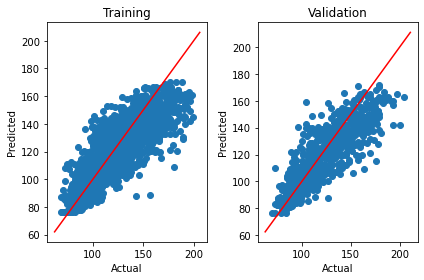

In [20]:
fig, axes = plt.subplots(1,2) # 1 row, 2 columns

# this makes the individual subplots
# Training Results
axes[0].scatter(x=y_train, y=model.predict(X_train)) #first row, first entry (left top)
axes[0].set_xlabel("Actual", fontsize=10)
axes[0].set_ylabel("Predicted",  fontsize=10)
axes[0].set_title("Training")
# add 45 deg line
x = np.linspace(*axes[0].get_xlim())
axes[0].plot(x, x, color='red')
# Validation Results
axes[1].scatter(x=y_test, y=model.predict(X_test)) # first row, second entry (right top)
axes[1].set_xlabel("Actual", fontsize=10)
axes[1].set_ylabel("Predicted",  fontsize=10)
axes[1].set_title("Validation")
# add 45 deg line
x = np.linspace(*axes[1].get_xlim())
axes[1].plot(x, x, color='red')

# tight layout
fig.tight_layout()

# show the plot
plt.show()